In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import backend
from tensorflow.python.keras import layers
from tensorflow.python.keras.applications import imagenet_utils
from tensorflow.python.keras.engine import training
from tensorflow.python.keras.utils import data_utils
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.util.tf_export import keras_export

In [2]:
resNet_152 = tf.keras.applications.ResNet152(
    include_top=False, weights='imagenet', input_shape=(224, 224, 3),
    pooling=None)

In [3]:
resNet_101 = tf.keras.applications.ResNet101(
    include_top=False, weights='imagenet', input_shape=(224, 224, 3),
    pooling=None)


In [4]:
inception_v3 = tf.keras.applications.InceptionV3(
    include_top=False, weights='imagenet', input_shape=(224, 224, 3),
    pooling=None)

In [5]:
vgg_19 = tf.keras.applications.VGG19(
    include_top=False, weights='imagenet', input_shape=(224, 224, 3),
    pooling=None)


In [6]:
def image_to_embedding(image, model):
    #image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_AREA)
    image = cv2.resize(image, (224, 224))
    img = image[...,::-1]
    img = np.around(np.transpose(img, (0,1,2))/255.0, decimals=12)
    x_train = np.array([img])
    embedding = model.predict_on_batch(x_train)
    return embedding

In [7]:
path = r'D:\Documents\Cows_simils\Muzzle Images 2\training'

def build_embeddings(model, path):
    embeddings = {}
    for file in os.listdir(path):
        img = cv2.imread(os.path.join(path, file))
        result = image_to_embedding(img, model)
        #print(result.shape)
        embeddings[file] = result
    return embeddings

In [8]:
result_resNet152 = build_embeddings(resNet_152, path)
result_resNet101 = build_embeddings(resNet_101, path)
result_IncepV3 = build_embeddings(inception_v3, path)
result_vgg19 = build_embeddings(vgg_19, path)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(imgs):
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 3
    rows = 1
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(imgs[i-1])
    plt.show()

In [10]:
def compare_face(embeddings, img_path, model):
    img = cv2.imread(os.path.join(img_path))
    img_emb = image_to_embedding(img, model)
    #print(img_emb.shape)
    distance = {}
    for key in embeddings:
        euclidean_distance = np.linalg.norm(embeddings[key] - img_emb)
        distance[key] = euclidean_distance
    return distance

In [34]:
def find(embeddings,path, model):
    dir_path = r'D:\Documents\Cows_simils\Muzzle Images 2\training'
    distance = compare_face(embeddings, path, model)
    closest_img_id = sorted(distance.items(), key = 
             lambda kv:(kv[1], kv[0]))[:2]
    print(closest_img_id)
    imgs = []
    imgs.append(cv2.imread(path))
    for key in closest_img_id:
        #print(key)
        img = cv2.imread(os.path.join(dir_path, key[0]))
        imgs.append(img)
    plot(imgs)

[('002.jpg', 19.100714), ('021.jpg', 24.083942)]


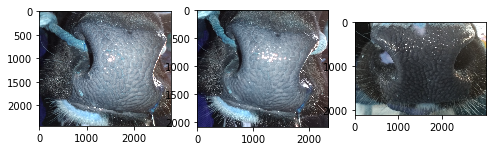

In [35]:
test_path = r"D:\Documents\Cows_simils\Muzzle Images 2\testing\001.jpg"
find(result_resNet152, test_path, resNet_152)

[('002.jpg', 17.958399), ('020.jpg', 21.525005)]


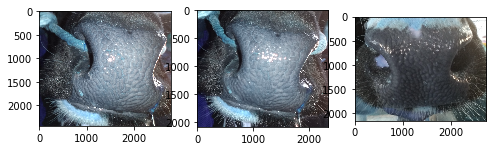

In [36]:
test_path = r"D:\Documents\Cows_simils\Muzzle Images 2\testing\001.jpg"
find(result_resNet101, test_path, resNet_101)

[('002.jpg', 201.65787), ('038.jpg', 213.39261)]


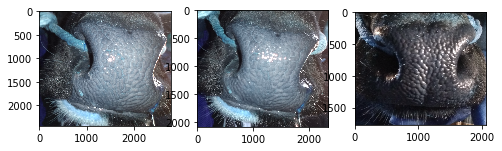

In [37]:
test_path = r"D:\Documents\Cows_simils\Muzzle Images 2\testing\001.jpg"
find(result_IncepV3, test_path, inception_v3)

[('067.jpg', 18.129597), ('068.jpg', 20.177494)]


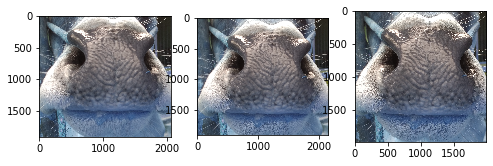

In [43]:
test_path = r"D:\Documents\Cows_simils\Muzzle Images 2\testing\066.jpg"
find(result_vgg19, test_path, vgg_19)

In [44]:
!pip install flask